In [22]:
# =============================================================================
# Lectura de un fichero
# =============================================================================
#Librería estructura de datos
import pandas as pd

datos = pd.read_csv("/content/csv_result-moviles.csv", sep = ",")

In [23]:
# =============================================================================
# Análisis descriptivos preliminares (conociendo nuestros datos)
# =============================================================================
#Descriptiva de los datos
descriptives = datos.describe()


#Valores blancos
print(datos.isnull().sum())
print(pd.isnull(datos).sum())

#Datos únicos que contiene cada variable
datos["battery_power"].unique()
datos["blue"].unique()
datos["clock_speed"].unique()
datos["dual_sim"].unique()
datos["fc"].unique()
datos["four_g"].unique()
datos["int_memory"].unique()
datos["m_dep"].unique()
datos["mobile_wt"].unique()
datos["n_cores"].unique()
datos["pc"].unique()
datos["px_height"].unique()
datos["px_width"].unique()
datos["ram"].unique()
datos["sc_h"].unique()
datos["sc_w"].unique()
datos["talk_time"].unique()
datos["three_g"].unique()
datos["touch_screen"].unique()
datos["wifi"].unique()
datos["price_range"].unique()


#Contar cuántos valores únicos tiene cada variable
datos["battery_power"].unique()
datos["blue"].unique()
datos["clock_speed"].unique()
datos["dual_sim"].unique()
datos["fc"].unique()
datos["four_g"].unique()
datos["int_memory"].unique()
datos["m_dep"].unique()
datos["mobile_wt"].unique()
datos["n_cores"].unique()
datos["pc"].unique()
datos["px_height"].unique()
datos["px_width"].unique()
datos["ram"].unique()
datos["sc_h"].unique()
datos["sc_w"].unique()
datos["talk_time"].unique()
datos["three_g"].unique()
datos["touch_screen"].unique()
datos["wifi"].unique()
datos["price_range"].unique()



id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


array([1, 2, 3, 0])

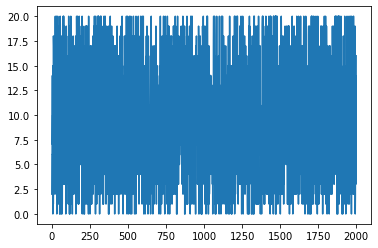

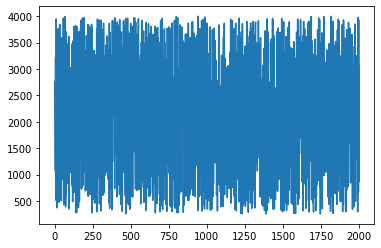

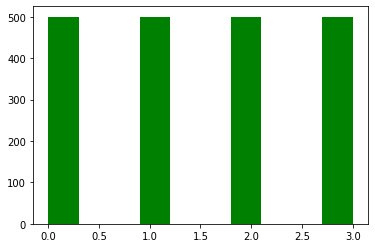

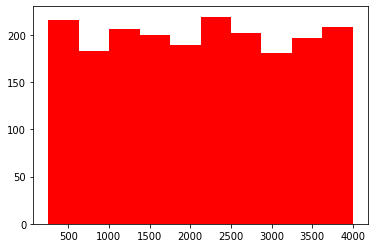

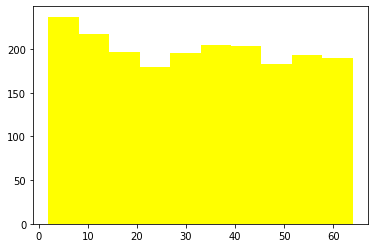

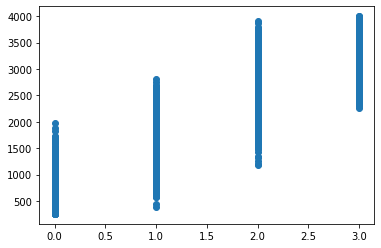

In [19]:
# =============================================================================
# Gráficos descriptivos. Correlaciones
# =============================================================================
import matplotlib.pyplot as plt
# Gráfico de líneas
plt.plot(datos["pc"])
plt.show()
plt.plot(datos["ram"])
plt.show()
# Histogramas
plt.hist(datos["price_range"], facecolor = 'green')
plt.show()
plt.hist(datos["ram"], facecolor = 'red')
plt.show()
plt.hist(datos["int_memory"], facecolor = 'yellow')
plt.show()
# Gráfico de dispersión
plt.scatter(datos["price_range"],datos["ram"])
plt.show()

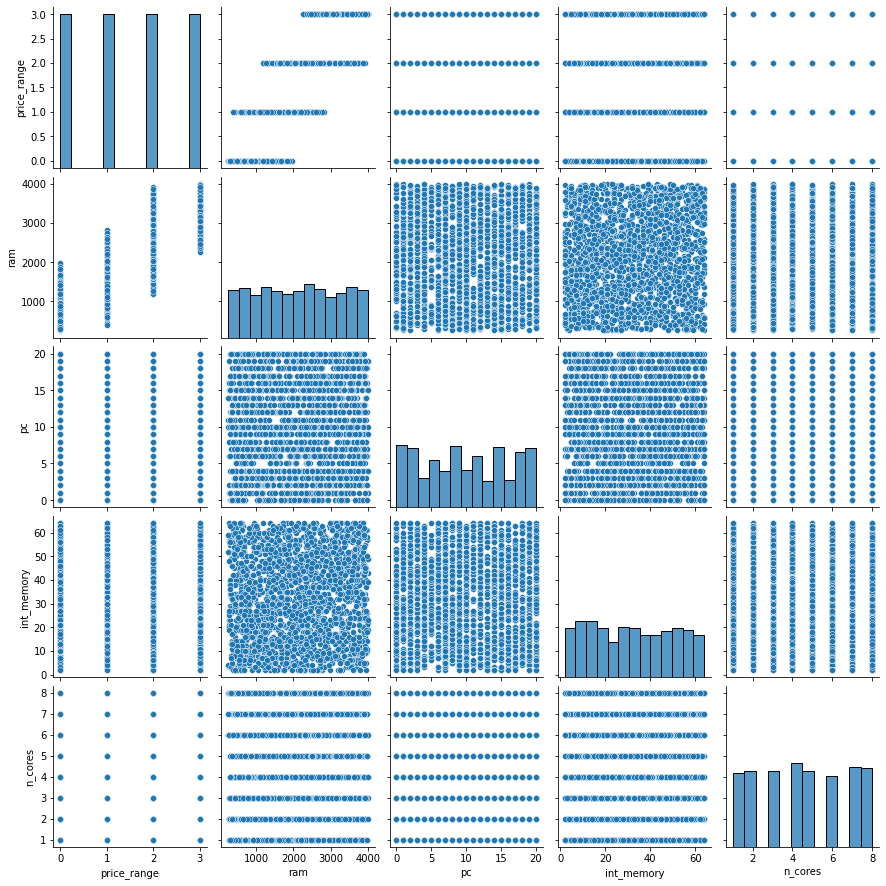

In [21]:
import seaborn as sns
sns.pairplot(datos.select_dtypes(exclude=[object]), vars=["price_range", "ram", "pc", "int_memory", "n_cores"])

In [24]:
import plotly.express as px 
  
df = datos
  
fig = px.box(df, x="price_range", y="ram") 
fig.show()

fig = px.box(df, x="price_range", y="battery_power") 
fig.show()

fig = px.box(df, x="n_cores", y="ram") 
fig.show()

In [35]:
import plotly
from plotly.offline import plot
import plotly.graph_objs as go

plotly.offline.plot({
"data": [
    go.Scatter(    x=[1, 3, 5],
    y=[10, 11, 12, 13], mode='markers',
    marker=dict(
        size=[45, 120, 80, 10]))],
"layout": go.Layout(showlegend=False,
    height=600,
    width=600,
)
})


'temp-plot.html'

In [34]:
fig = go.Figure(data=[{'type': 'scatter', 'y': [2.5, 1.4, 8]}])

plot(fig)

'temp-plot.html'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f2dd69ad0>,
      dtype=object)

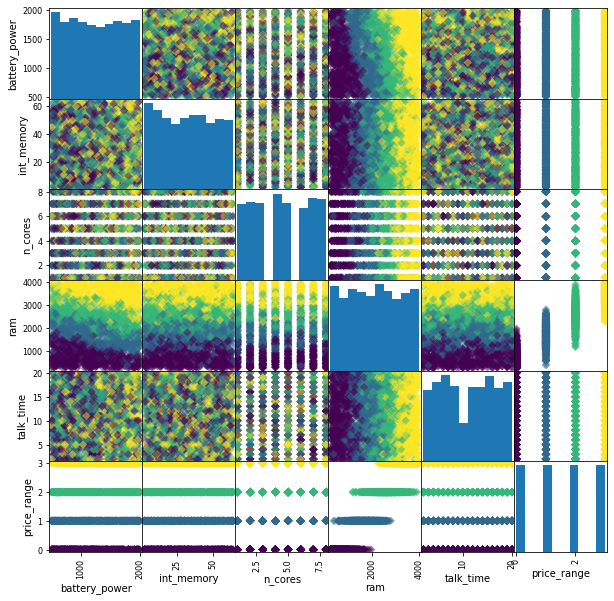

In [6]:
# =============================================================================
# Preprocesamiento
# =============================================================================
#Borrar atributos (variables) que no sean numéricos
#1º opción. Seleccionar solo las variables numéricas y añadir variable objetivo
num_datos = datos.select_dtypes(exclude=[object]) 
num_datos.loc[:, "price_range"] = datos["price_range"]        
#2º opción. Borrar columnas
num_datos = datos.drop(["pc", "clock_speed", "id", "blue", "dual_sim", "fc", "four_g", "three_g", "m_dep", "mobile_wt", "px_height", "px_width", "sc_w", "sc_h", "touch_screen", "wifi"],
                      axis = 1) #filas 0



#Borrar registros nulos (o vacíos)
num_datos = num_datos.dropna()

#Convertir var. obj. en numérico
num_datos["price_range"].unique()

num_datos.loc[num_datos.loc[:, "price_range"] == "1", "price_range"] = 1
num_datos.loc[num_datos.loc[:, "price_range"] == "2", "price_range"] = 2
num_datos.loc[num_datos.loc[:, "price_range"] == "3", "price_range"] = 3
num_datos.loc[num_datos.loc[:, "price_range"] == "4", "price_range"] = 4


num_datos["price_range"].unique()

pd.plotting.scatter_matrix(num_datos, 
                               c = num_datos['price_range'], # color
                               figsize = [10, 10], # tamaño de la ventana   
                               s=35, #tamaño del marcador
                               marker = 'D') # tipo de marcar los puntos
 

Index(['battery_power', 'int_memory', 'n_cores', 'ram', 'talk_time',
       'price_range'],
      dtype='object')

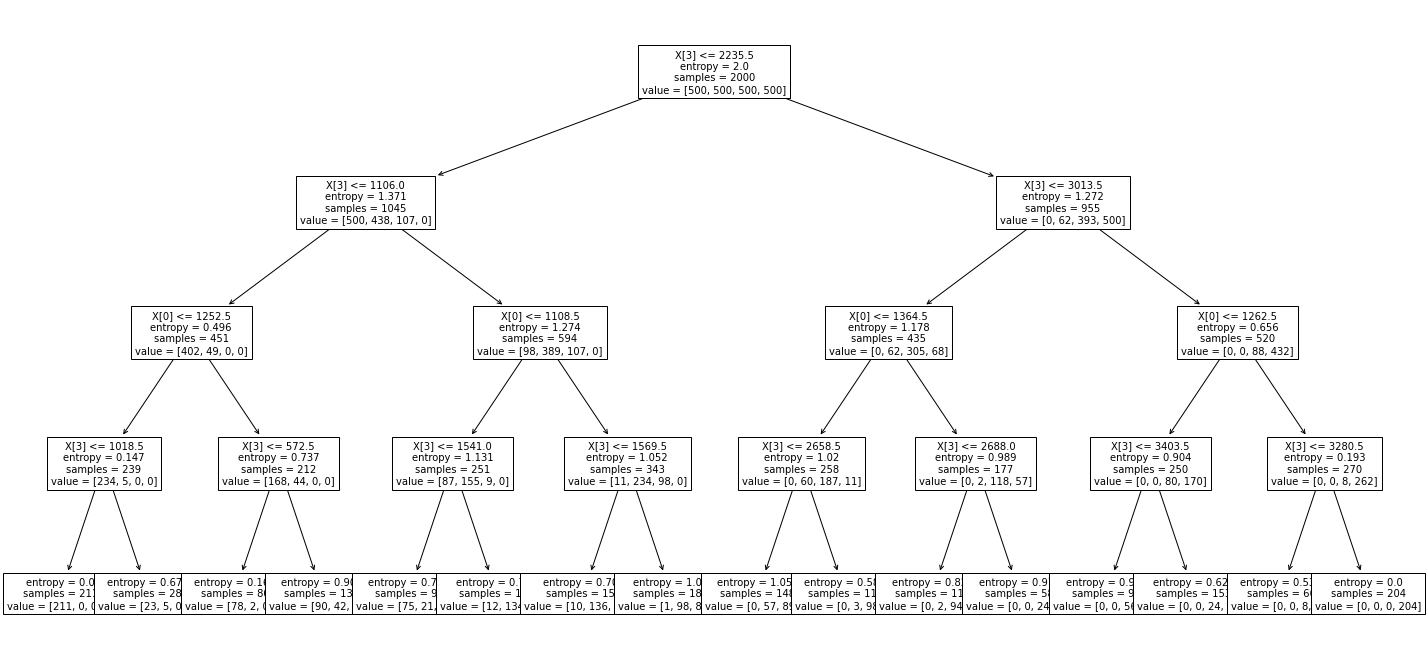

In [7]:
# =============================================================================
# Métodos supervisados. Decission Trees - Sklearn. CLASIFICACIÓN
# =============================================================================
# Importando el árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
 
#Selección de las variables
X = num_datos.values[:, :-1] #Variables explicativas
y = num_datos.values[:, -1] #variable objetivo
y = y.astype("int")

# Creando el modelo
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Ajustando el modelo
model = model.fit(X, y)

#Dibujar el árbol entrenado
fig, ax = plt.subplots(figsize=(25, 12)) #Tamaño del gráfico
tree.plot_tree(model, fontsize = 10)


num_datos.columns

Mean Absolute Error: 0.28621641890637634
Mean Squared Error: 0.18876823046862318
Root Mean Squared Error: 0.43447466032971727


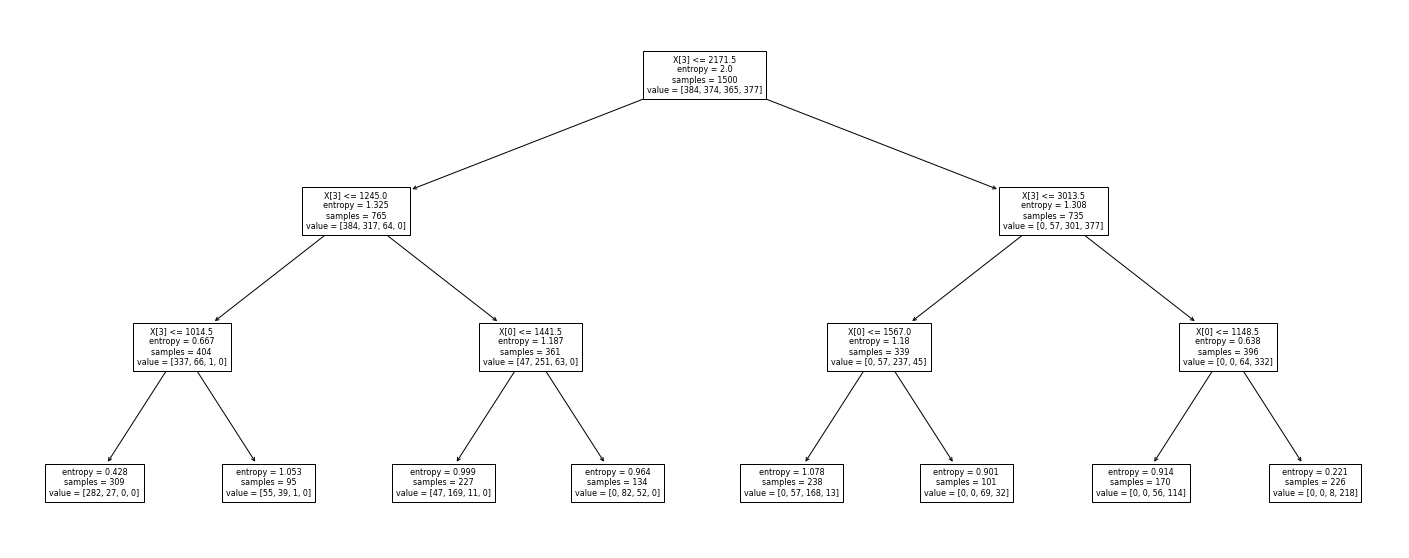

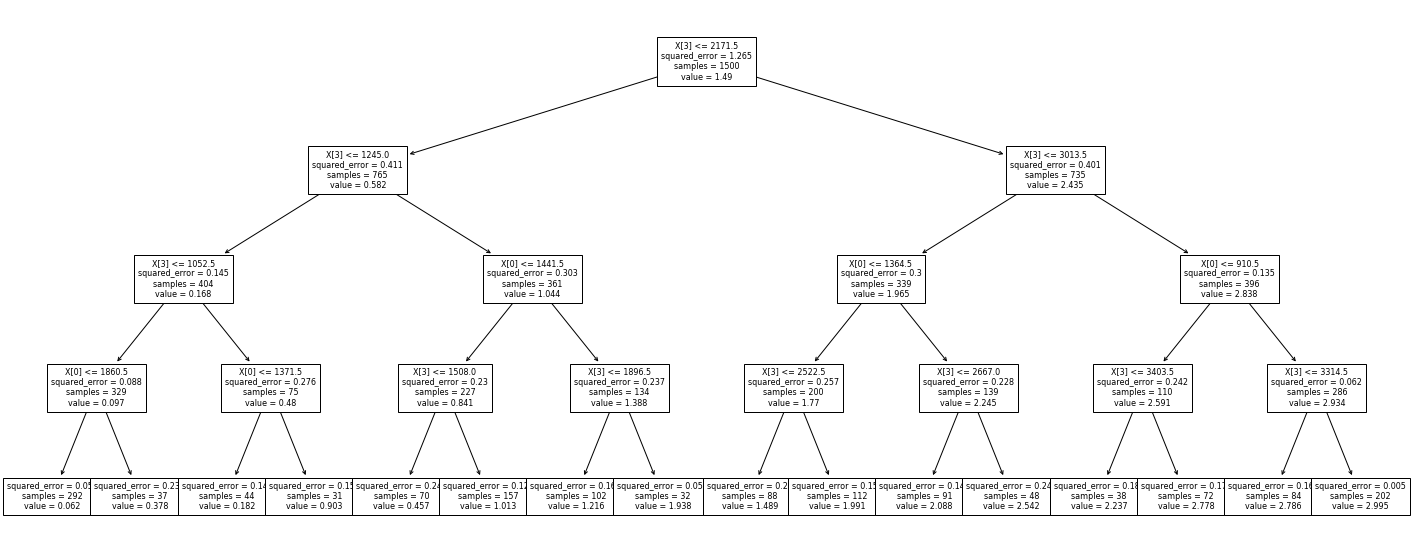

In [12]:
# =============================================================================
# Métodos supervisados. Decission Trees - Sklearn. PREDICCIÓN
# =============================================================================
from sklearn.model_selection import train_test_split #Separar el data set en training y test
from sklearn.metrics import accuracy_score #Métricas de la predicción del modelo. Precisión
from sklearn.metrics import confusion_matrix #Métricas de la predicción del modelo. Matriz de confusión

#Selección de las variables
X = num_datos.values[:, :-1] #Variables explicativas
y = num_datos.values[:, -1] #variable objetivo
y = y.astype("int")

#Data sets de training y de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#Crear el modelo
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Ajustando el modelo con el data set de training
model = model.fit(X_train, y_train) 

#Prediciendo sobre el data set de test
y_predict = model.predict(X_test)

#Métrica de precisión en la predicción
accuracy_score(y_test, y_predict)

#Matriz de confusión
pd.DataFrame(
    confusion_matrix(y_test, y_predict)
)

#Dibujar el árbol entrenado
fig, ax = plt.subplots(figsize=(25, 10)) #Tamaño del gráfico
tree.plot_tree(model, fontsize = 8)


num_datos.columns
# =============================================================================
# Métodos supervisados. Decission Trees - Sklearn. Regresión
# =============================================================================
from sklearn.tree import DecisionTreeRegressor


#Selección de las variables
X = num_datos.values[:, :-1] #Variables explicativas
y = num_datos.values[:, -1] #variable objetivo
y = y.astype("int")

#Data sets de training y de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

#Crear el modelo
model = DecisionTreeRegressor(max_depth=4)

# Ajustando el modelo con el data set de training
model = model.fit(X_train, y_train) 

#Prediciendo sobre el data set de test
y_predict = model.predict(X_test)





#Dibujar el árbol entrenado
fig, ax = plt.subplots(figsize=(25, 10)) #Tamaño del gráfico
tree.plot_tree(model, fontsize = 8)


import numpy as np
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

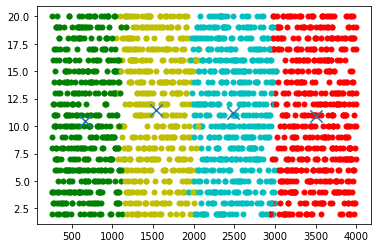

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
# =============================================================================
# Métodos NO supervisados. Clústering - KMeans, Sklearn
# =============================================================================

from sklearn.cluster import KMeans

#Seleccionar los atributos
K_datos = num_datos[["ram", "talk_time", "battery_power", "price_range"]]

#Crear modelo
kmeans = KMeans(n_clusters = 4)

#Ajustar modelo
kmeans.fit(K_datos)

#Dibujar el clústering
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

#Dibujar los puntos con los colores de cada clúster
colors = ["g.","r.","c.","y."]
for i in range(len(K_datos)):
    plt.plot(K_datos.iloc[i,0], K_datos.iloc[i,1], colors[labels[i]], markersize = 10)
    
#Dibujar los centroides de cada clúster
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()



K_datos["cluster"] = labels


summary0 = K_datos[K_datos.cluster == 0].describe()
summary1 = K_datos[K_datos.cluster == 1].describe()
summary2 = K_datos[K_datos.cluster == 2].describe()
summary3 = K_datos[K_datos.cluster == 3].describe()



In [26]:
####### Reglas de asociación 

!pip install apyori
 
import numpy as np 
import pandas as pd

datos = datos[["dual_sim", "fc", "blue", "price_range"]]

# Intializing the list
transacts = []
# populating a list of transactions
for i in range(0, 500): 
  transacts.append([str(datos.values[i,j]) for j in range(0, 3)]) # la ultima columna 3

from apyori import apriori
rule = apriori(transactions = transacts, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)



output = list(rule) # returns a non-tabular output
# putting output into a pandas dataframe
def inspect(output):
    lhs         = [tuple(result[2][0][0])[0] for result in output]
    rhs         = [tuple(result[2][0][1])[0] for result in output]
    support    = [result[1] for result in output]
    confidence = [result[2][0][2] for result in output]
    lift       = [result[2][0][3] for result in output]
    return list(zip(lhs, rhs, support, confidence, lift))
output_DataFrame = pd.DataFrame(inspect(output), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])



output_DataFrame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
